In [1]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [2]:
library(tidyverse)
library(lubridate)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



# Lecture 15: More on factors & dates

## Trump Twitter data
We will now use what we have learned in the past two classes to analyze some real data. 

In [4]:
load("tt.RData")  # see tt/load_tweets.ipynb for code that produces this data.

In [8]:
trump_tweets %>% slice(1)

  source             id_str           
1 Twitter Web Client 20595488004775936
  text                                                      
1 WIshing everyone a happy, healthy and prosperous New Year!
  created_at                     retweet_count in_reply_to_user_id_str
1 Thu Dec 30 21:42:01 +0000 2010 144           NA                     
  favorite_count is_retweet
1 42             FALSE     

`trump_tweets` is a dataset of all ~~37,169~~ 41,958 Tweets that Donald Trump has sent since 2010.

In [32]:
# print(trump_tweets)
dttm <- "Thu Dec 30 21:42:01 +0000 2010"
splitted <- str_split(dttm, " ")[[1]] %>% print
make_date()
ymd(str_c(splitted[6], splitted[2], splitted[3], sep=" "))

[1] "Thu"      "Dec"      "30"       "21:42:01" "+0000"    "2010"    


[1] "1970-01-01"

[1] "2010-12-30"

### Task #1
Each tweet has a timestamp in the `created_at` column. We want to convert this column to a proper date-time object so that we can analyze the time component of these tweets.

In [44]:
trump_tweets2 <- trump_tweets %>% mutate(
    dt=str_replace(created_at,
    "\\w+ (\\w+ \\d+) ([\\d:]+) \\+0000 (\\d{4})",
    "\\1 \\3 \\2") %>% mdy_hms) %>% print

# A tibble: 41,958 x 9
   source id_str text  created_at retweet_count in_reply_to_use… favorite_count
   <chr>  <chr>  <chr> <chr>              <int> <chr>                     <int>
 1 Twitt… 20595… WIsh… Thu Dec 3…           144 <NA>                         42
 2 Twitt… 17979… Wish… Thu Dec 2…           109 <NA>                         55
 3 Twitt… 15413… Don'… Thu Dec 1…           112 <NA>                         20
 4 Twitt… 14785… I'll… Tue Dec 1…           250 <NA>                         37
 5 Twitt… 14359… ...T… Mon Dec 1…            12 <NA>                          6
 6 Twitt… 14358… Thos… Mon Dec 1…            14 <NA>                          6
 7 Twitt… 14356… "All… Mon Dec 1…            24 <NA>                          8
 8 Twitt… 13242… Cong… Fri Dec 1…            44 <NA>                         12
 9 Twitt… 12960… Toni… Thu Dec 0…            55 <NA>                          7
10 Twitt… 10355… Toni… Thu Dec 0…            24 <NA>                          3
# … with 41,948 m

### Task #2
Plot the number of Tweets that Donald Trump has made for each quarter of the year from 2010 to present.
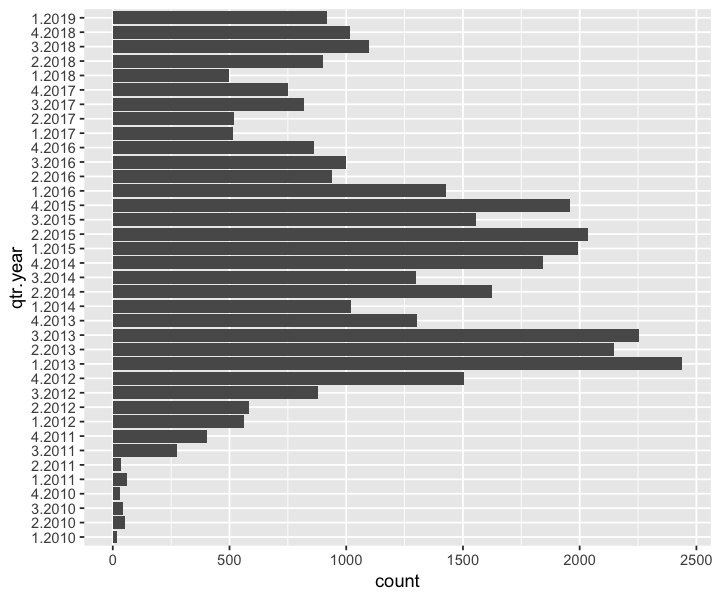

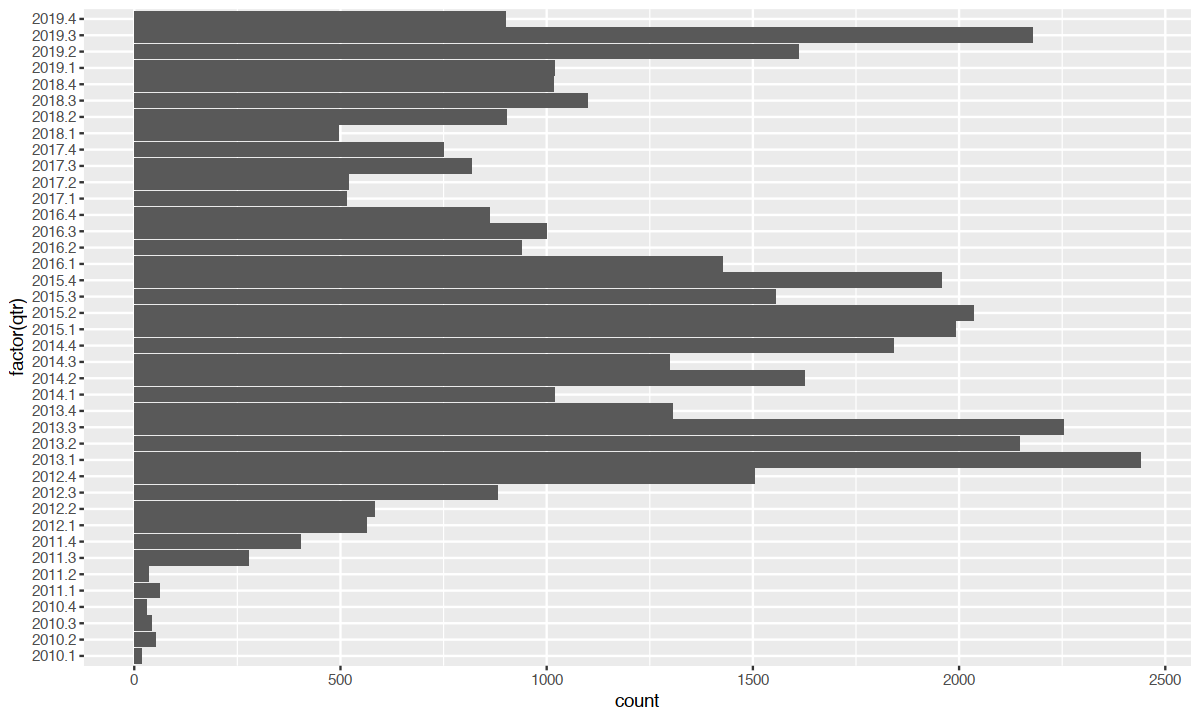

In [65]:
trump_tweets2 %>% mutate(year = year(dt), 
                         qtr = quarter(dt, with_year = T)) %>% 
    ggplot + geom_bar(aes(x=factor(qtr))) + coord_flip()

### Task #3
Recall that `words` contains common English words. After filtering out these words, and all words that were shorter than six characters, the most common words that the President used in 2018 were:

```
# A tibble: 11 x 2
   words               n
   <chr>           <int>
 1 american          161
 2 border            269
 3 collusion         133
 4 democrats         291
 5 military          183
 6 president         356
 7 realdonaldtrump   182
 8 russia            133
 9 security          151
10 states            150
11 united            150

```

What about for 2012?

In [85]:
filter(trump_tweets2, year(dt) == 2019) %>% 
    unnest_tokens(output = word, input = text) %>%
    select(created_at, word) %>% 
    count(word) %>% 
    filter(str_length(word) >= 6) %>% top_n(15)




Selecting by n


   word            n  
1  america         236
2  american        232
3  because         182
4  border          384
5  country         390
6  democrats       512
7  mueller         191
8  nothing         196
9  people          512
10 president       746
11 realdonaldtrump 486
12 should          274
13 states          239
14 united          252
15 whitehouse      184

### Task #4
What were the president's favorite #hashtags in 2018? 2012?

In [113]:
library(tidytext)

filter(trump_tweets2, str_detect(text, "#")) %>% 
    unnest_tokens(input=text, output=word, token="tweets") %>% 
    filter(str_detect(word, "^#")) %>% 
    count(year(dt), word) %>% top_n(20) %>% arrange(desc(n))

Selecting by n


   year(dt) word                   n  
1  2015     #trump2016             415
2  2016     #trump2016             347
3  2015     #makeamericagreatagain 279
4  2016     #makeamericagreatagain 275
5  2013     #celebapprentice       140
6  2015     #celebapprentice       139
7  2016     #maga                  108
8  2014     #trump2016             107
9  2015     #celebrityapprentice   102
10 2016     #americafirst           86
11 2016     #draintheswamp          78
12 2016     #votetrump              69
13 2018     #maga                   67
14 2011     #timetogettough         62
15 2016     #imwithyou              62
16 2016     #bigleaguetruth         58
17 2015     #trump                  53
18 2019     #maga                   46
19 2016     #debate                 45
20 2011     #trumpvlog              43

### Task #5
At what hour of the day (or night) is the Donald Trump most likely to tweet, and how has this changed over time?

In [21]:
# Solution

### Task #6
"Sentiment analysis" refers to the act of assigning a label such as "positive" or "negative" to a piece of text. We will perform a simple type of sentiment analysis by assigning a numerical score to certain words in each tweet, using the `sentiments` table:

In [115]:
library(tidytext)
sentiments %>% print

# A tibble: 27,314 x 4
   word        sentiment lexicon score
   <chr>       <chr>     <chr>   <int>
 1 abacus      trust     nrc        NA
 2 abandon     fear      nrc        NA
 3 abandon     negative  nrc        NA
 4 abandon     sadness   nrc        NA
 5 abandoned   anger     nrc        NA
 6 abandoned   fear      nrc        NA
 7 abandoned   negative  nrc        NA
 8 abandoned   sadness   nrc        NA
 9 abandonment anger     nrc        NA
10 abandonment fear      nrc        NA
# … with 27,304 more rows


An example of how this works:

In [126]:
trump_sentiments <- trump_tweets2 %>%
    mutate(month = month(dt), year = year(dt)) %>%
    unnest_tokens(input=text, output=word, token="tweets") %>% 
    inner_join(sentiments) %>% drop_na(score)

Joining, by = "word"


Average the sentiment by month for the full data set, and make a plot of the monthly average from 2014 to 2018. 

President Trump declared his candidacy in June of 2015. Notice anything?

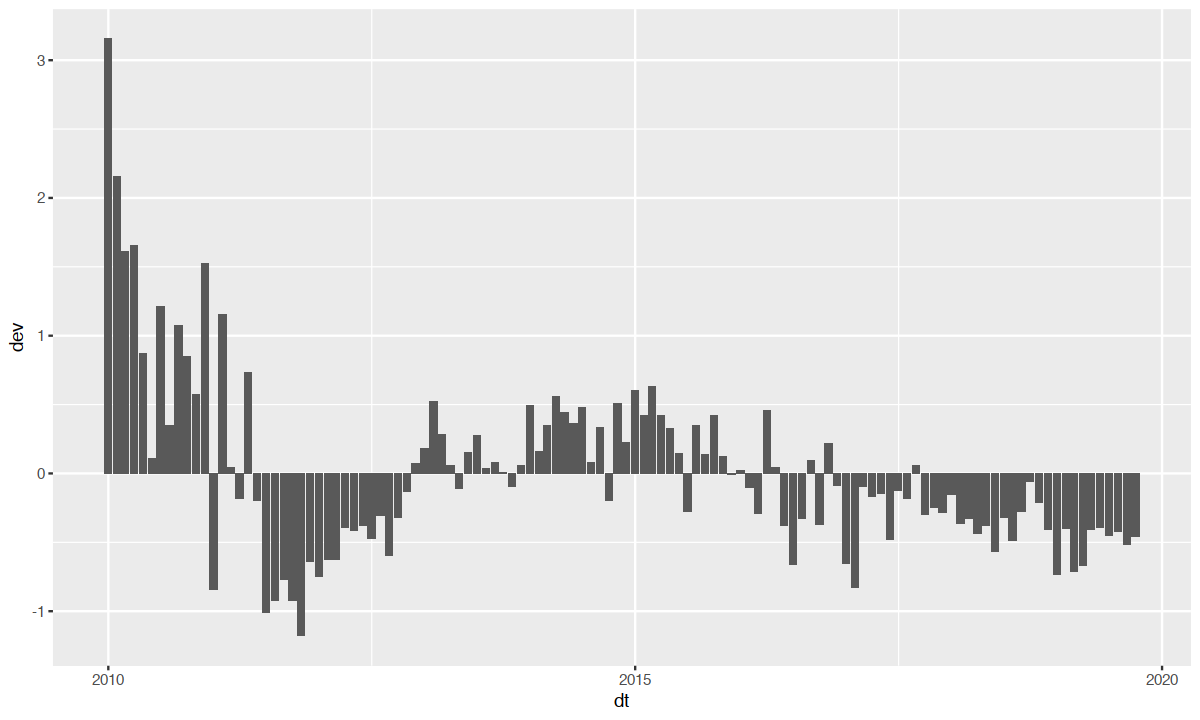

In [130]:
trump_sentiments %>% group_by(year, month) %>% 
    summarize(m = mean(score), n = n()) %>% ungroup %>%
    mutate(dev = m - mean(m), dt = make_date(year, month, 1)) %>% 
    ggplot + geom_col(aes(x = dt, y = dev))